In [242]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

# Weather data

In [243]:
data_frame = pd.read_csv("MATF_Hackathon_2021/BelgradeAirport_2021-2012.csv")

clean_data = pd.DataFrame()

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (6,12,13,16,17,18,19,20,21,23,25,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [263]:
data_frame["U"].head(52)

0                                       67
1                                       62
2                                       57
3                                       53
4                                       45
5                                       41
6                                       38
7                                       37
8                                       37
9                                       38
10                                      41
11                                      44
12                                      52
13                                      64
14                                      74
15                                      88
16                                      95
17                                      95
18                                      84
19                                      86
20                                      86
21                                      84
22                                      81
23         

In [245]:
data_frame.iloc[0]

DateTime                         2021-03-31 23:00
T                                            11.9
Po                                         1010.5
P                                          1022.5
Pa                                           -0.5
U                                              67
DD          Wind blowing from the north-northwest
Ff                                              1
ff10                                          NaN
ff3                                           NaN
N                                       no clouds
WW                                               
W1                                            NaN
W2                                            NaN
Tn                                            NaN
Tx                                            NaN
Cl                                            NaN
Nh                                            NaN
H                                             NaN
Cm                                            NaN


### Parse DateTime

In [246]:
def datetime2ymd(in_df, out_df):
    out_df["year"]  = in_df["DateTime"].astype(str).str[:4].astype(int)
    out_df["month"] = in_df["DateTime"].astype(str).str[5:7].astype(int)
    out_df["day"]   = in_df["DateTime"].astype(str).str[8:10].astype(int)
    out_df["hour"]  = in_df["DateTime"].astype(str).str[11:13].astype(int)
    out_df["min"]   = in_df["DateTime"].astype(str).str[14:].astype(int)
    
    return out_df

In [247]:
clean_data = datetime2ymd(data_frame, clean_data)

In [248]:
copy_columns = ["T", "Po", "U", "Ff", "Tn"]
clean_data[copy_columns] = data_frame[copy_columns]

In [249]:
clean_data

,year,month,day,hour,min,T,Po,U,Ff,Tn
0,2021,3,31,23,0,11.9,1010.5,67,1.0,NaN
1,2021,3,31,22,0,12.9,1010.9,62,1.0,NaN
2,2021,3,31,21,0,14.3,1011.0,57,1.0,NaN
3,2021,3,31,20,0,15.3,1011.0,53,1.0,NaN
4,2021,3,31,19,0,17.5,1011.1,45,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...
78461,2012,9,26,12,0,29.0,1002.3,Wind blowing from the south,NaN,NaN
78462,2012,9,26,11,0,28.0,1002.3,Wind blowing from the south-west,NaN,NaN
78463,2012,9,26,10,0,26.0,1002.2,Wind blowing from the south-southwest,NaN,NaN
78464,2012,9,26,9,0,24.0,1002.1,Wind blowing from the south-southwest,NaN,NaN


# Target data

In [250]:
target_df = pd.read_csv("MATF_Hackathon_2021/SviPodaci_mStanica_BeogradNBG.csv")
clean_target = pd.DataFrame()

target_df = target_df.rename(columns={"Datum_i_Vreme": "DateTime"})

target_df.head()

,DateTime,MernaStanica,B,CO,NO2,O3,PM10,PM25,SO2
0,2012-06-11 16:00,Beograd Novi Beograd,0.269729,0.590997,63.094881,53.622829,23.109444,9.742659,2.789345
1,2015-03-09 08:00,Beograd Novi Beograd,2.042423,1.113447,19.640968,56.213282,26.856319,19.293327,84.947258
2,2010-05-19 09:00,Beograd Novi Beograd,0.778962,0.905177,26.346479,NaN,22.899085,12.057213,2.703677
3,2010-07-17 00:00,Beograd Novi Beograd,0.686226,0.994739,31.578526,44.185095,29.241251,22.910294,8.567367
4,2018-05-01 00:00,Beograd Novi Beograd,NaN,0.250000,NaN,43.600000,NaN,NaN,12.900000


In [251]:
clean_target = datetime2ymd(target_df, clean_target)
copy_columns = ["B", "CO", "NO2", "O3", "PM10", "PM25", "SO2"]

clean_target[copy_columns] = target_df[copy_columns]
clean_target = clean_target.sort_values(by=["year", "month", "day", "hour", "min"])

clean_target.head()

,year,month,day,hour,min,B,CO,NO2,O3,PM10,PM25,SO2
23026,2009,11,17,20,0,NaN,NaN,NaN,NaN,NaN,54.221211,NaN
28045,2009,11,17,21,0,NaN,NaN,NaN,NaN,NaN,61.848214,NaN
52868,2009,11,17,22,0,NaN,NaN,NaN,NaN,NaN,47.386997,NaN
68772,2009,11,17,23,0,NaN,NaN,NaN,NaN,NaN,42.317648,NaN
41525,2009,11,18,0,0,NaN,NaN,NaN,NaN,NaN,41.457331,NaN


## Data ploting

#### By Hour

Text(0.5, 0, 'Hour')

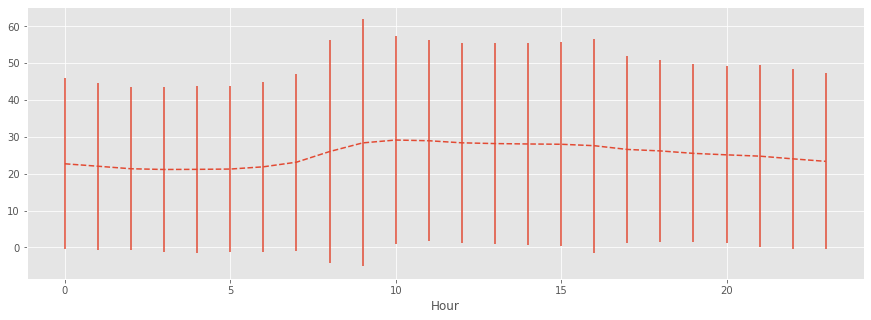

In [252]:
month = clean_target.loc[
    (clean_target["year"].isin([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])) &
    (clean_target["month"].isin([10, 11, 12, 1, 2]))
]

polution_by_hour = []
std_by_hour = []
for hour in range(24):
    polution_by_hour.append(month.loc[month["hour"] == hour].mean()["SO2"])
    std_by_hour.append(month.loc[month["hour"] == hour].std()["SO2"])
    
plt.errorbar(list(range(24)), polution_by_hour, std_by_hour, linestyle="--")
plt.xlabel("Hour")

#### By Month

Text(0.5, 0, 'Month')

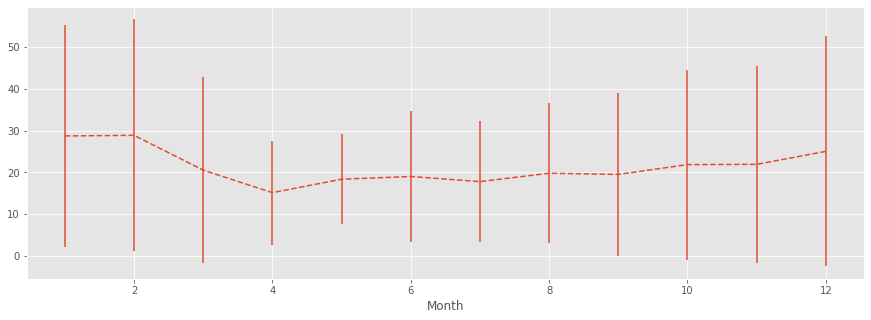

In [253]:
years = clean_target.loc[
    (clean_target["year"].isin([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]))
]

polution_by_month = []
std_by_month = []
for mth in range(1, 13):
    polution_by_month.append(years.loc[years["month"] == mth].mean()["SO2"])
    std_by_month.append(years.loc[years["month"] == mth].std()["SO2"])
    
plt.errorbar(list(range(1, 13)), polution_by_month, std_by_month, linestyle="--")
plt.xlabel("Month")

### Corelation

In [254]:
clean_data["U"]

0                                           67
1                                           62
2                                           57
3                                           53
4                                           45
                         ...                  
78461              Wind blowing from the south
78462         Wind blowing from the south-west
78463    Wind blowing from the south-southwest
78464    Wind blowing from the south-southwest
78465     Wind blowing from the west-southwest
Name: U, Length: 78466, dtype: object